
# CODE TO PERFORM SIMPLE LINEAR REGRESSION

# PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

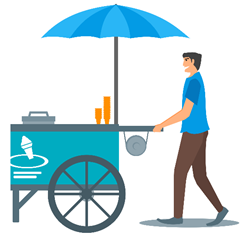

# STEP #1: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #2: IMPORT DATASET

In [2]:
IceCream = pd.read_csv("IceCreamData.csv")

In [3]:
IceCream.head(100)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [4]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


# STEP#3: VISUALIZE DATASET

D:\Miniconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


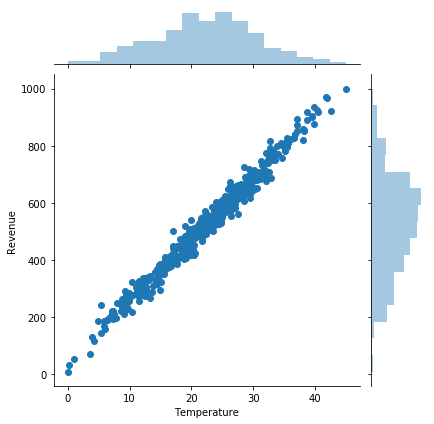

In [7]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream)

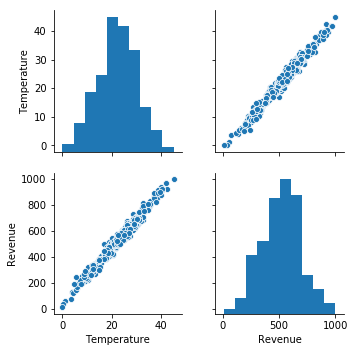

In [8]:
sns.pairplot(IceCream)

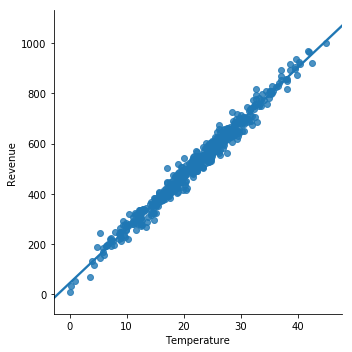

In [9]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [10]:
y = IceCream['Revenue']

In [11]:
X = IceCream[['Temperature']]

In [12]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
5,14.352514
6,13.707780
7,30.833985
8,0.976870
9,31.669465


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# STEP#5: TRAIN THE MODEL

In [15]:
X_train.shape

(375, 1)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression(fit_intercept =True)

In [18]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.49459808]
Linear Model Coefficient (b):  44.3544648047


# STEP#6: TEST THE MODEL 

In [20]:
y_predict = regressor.predict( X_test)
y_predict

array([441.46790594, 506.23418434, 453.2808302 , 864.29455601,
       673.09558812, 291.61752312, 233.38447191, 233.31246217,
       715.6090207 , 719.55629471, 789.74513617, 442.13846561,
       314.57410058, 958.20332957, 651.85265653, 423.91687469,
       547.85784116, 661.89243508, 732.27542865, 249.78426871,
       428.48870606, 170.27958485, 454.0261685 , 364.55889854,
       525.0253159 , 637.58530452, 326.20135558, 570.37955818,
       538.80521105, 452.43532428, 523.92213403, 549.42447301,
       413.82398836, 723.15363645, 527.61317738, 621.69341293,
       283.64750004, 653.41169906, 830.39289525, 365.30118009,
       680.36845691, 632.77770686, 806.51285117, 251.80947608,
       559.70747648, 357.12692287, 217.0238591 , 683.14202613,
       652.04468411, 434.45890097, 739.37816855, 610.45882254,
       447.92324059, 238.21124074, 420.87692937, 522.07453554,
       367.80352854,  44.3544648 , 471.0059174 , 494.62144551,
       347.63595751, 659.82504208, 566.85151159, 436.27

In [21]:
y_test

111    427.211360
68     483.489769
28     517.534028
228    850.246982
375    697.147473
4      316.240194
439    264.123914
32     237.763911
49     697.833986
128    731.598223
454    756.962562
266    420.966453
124    319.349462
17     921.508275
122    655.433979
103    401.433018
172    539.527740
291    631.318237
238    675.807151
339    235.364643
381    440.677829
300    170.237756
125    450.473207
359    384.699415
498    566.217304
432    634.121978
219    332.150105
356    596.876750
40     539.688006
349    482.571988
          ...    
279    521.267379
437    654.129376
147    446.946651
414    658.593732
87     344.688765
64     498.757050
115    689.930778
446    322.888783
401    916.648613
134    158.849806
275    530.748225
129    751.054570
51     621.189730
297    857.526641
218    413.914067
419    505.743867
151    297.499120
415    477.315188
58     303.734381
424    445.772400
331    678.751388
247    538.179684
216    402.398461
190    339.109583
41     242

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

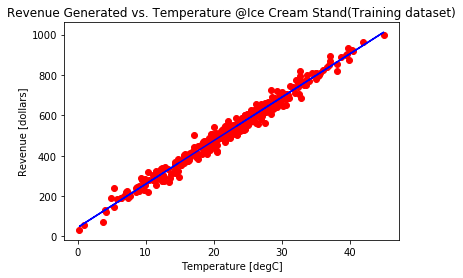

In [22]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

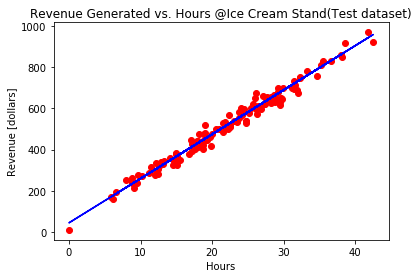

In [23]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

In [24]:
y_predict = regressor.predict(30)
y_predict

ValueError: Expected 2D array, got scalar array instead:
array=30.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.